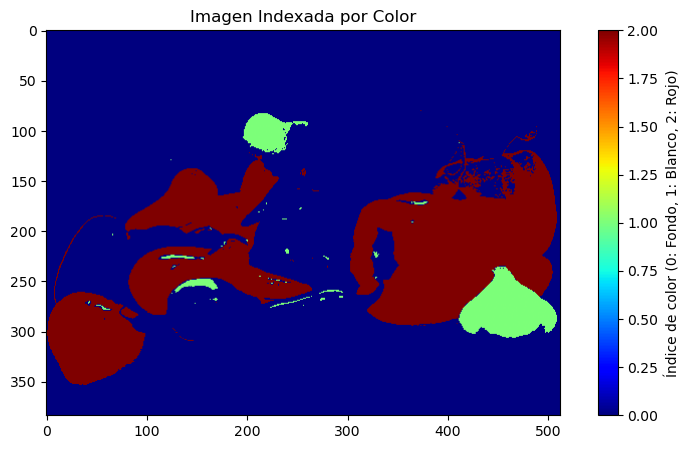

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im_bgr = cv2.imread('./images/peppers.png')
im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

im_hsv = cv2.cvtColor(im_rgb, cv2.COLOR_RGB2HSV)

# Para los ajos
lower_white = np.array([0, 0, 180])   
upper_white = np.array([180,100, 255]) 
mask_white = cv2.inRange(im_hsv, lower_white, upper_white)

# Para los pimientos rojos
lower_red1 = np.array([0, 120, 70])  
upper_red1 = np.array([10, 255, 255])
mask_red1 = cv2.inRange(im_hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 120, 70])  
upper_red2 = np.array([180, 255, 255])
mask_red2 = cv2.inRange(im_hsv, lower_red2, upper_red2)

mask_red = cv2.bitwise_or(mask_red1, mask_red2)


indexed_image = np.zeros(im_rgb.shape[:2], dtype=np.uint8)  
indexed_image[mask_white > 0] = 1  
indexed_image[mask_red > 0] = 2    


plt.figure(figsize=(10, 5))
plt.imshow(indexed_image, cmap='jet')
plt.colorbar(label="Índice de color (0: Fondo, 1: Blanco, 2: Rojo)")
plt.title("Imagen Indexada por Color")
plt.show()
